<div style="background-color: darkturquoise; padding: 10px; font-size: 60px; color: white; text-align: center; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5); line-height: 1.2;">

  <strong style="font-size: 50px;">Healthcare Fraud Buster</strong>

</div>


## Project Overview / Goal:    

This project aims to create a positive impact on the healthcare system by reducing insurance premiums, their by ensuring high-quality, affordable healthcare for all.


In [ ]:
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing numpy for scientific computing
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing colormaps for data visualization
from matplotlib import colormaps
list(colormaps)
# Importing seaborn for data visualization
import seaborn as sns
# Importing warnings to ignore warnings
import rough_wrangle as w
# Importing sklearn for machine learning
from sklearn.preprocessing import OneHotEncoder, LabelEncoder 
# Importing sklearn for machine learning        
from sklearn.model_selection import train_test_split
# Import the DecisionTreeClassifier from scikit-learn 
from sklearn.tree import DecisionTreeClassifier
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# Import the LogisticRegression from scikit-learn
from sklearn.linear_model import LogisticRegression
# Import warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")



<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
         <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">PLAN </strong> ---Acquire--- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


Initial Questions
 - What is the main objective of this project?
 - From where to obtain the data for this project?
 - What format is the data in, and what preprocessing steps are needed?
 - Are there any missing values or outliers that require attention?
 - Which features (variables) will be used as predictors in the models?
 - What types of machine learning models are suitable for the problem? 

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">ACQUIRE </strong> --- Prepare --- Explore --- Model --- Deliver
    </div>
</div>


-   The functions acquire_test_data and acquire_train_data functions in the wrangle module acquires data 
from the .CSVs in 'https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis/data' 
which has data from CMS(Center for Medicare & Medicaid Services )

- Acquired two sets(train,test) of four datasets 
    - The inpatient dataset comprises of 50025 rows and 30 columns.
    - The outpatient dataset comprises of 643578 rows and 27
     columns
    - The beneficiary dataset comprises of 202524 rows and 25 columns. 
    - 

- Each observation in the inpatient dataset represents a specific claim raised by a specific provider for a specific beneficiary who was an inpatient.

- Each observation in the outpatient dataset represents a specific claim raised by a specific provider for a specific beneficiary who was an outpatient.

- Each observation in the beneficiary dataset represents personal and medical informations of each beneficiary.


In [21]:
# call the function to acquire the data from wrangle file for test data
test_outpatient_df,test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()
# call the function to acquire the data from wrangle file for train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


In [16]:
# print summary statistics
w.summarize_outliers(train_outpatient_df, k=1.5)

Shape of Data: 
(517737, 27)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null

In [18]:
# print summary statistics
w.summarize_outliers(train_inpatient_df, k=1.5)

Shape of Data: 
(40474, 30)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  Clm

In [19]:
# print summary statistics
w.summarize_outliers(train_beneficiary_df, k=1.5)

Shape of Data: 
(138556, 25)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 no

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan --- Acquire---<strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;">PREPARE</strong> --- Explore --- Model --- Deliver
    </div>
</div>


### Combine fraud data


In [24]:
# Combine the dataframes vertically using pd.concat
combined_df = pd.concat([train_df, test_df])
# Sort the combined dataframe based on the 'Alphanumeric_Field' column
fraud_df = combined_df.sort_values(by='Provider')

# Sort the index of the sorted dataframe
fraud_df = fraud_df.reset_index(drop=True)

# Display the sorted dataframe
print(fraud_df)


      Provider PotentialFraud
0     PRV51001             No
1     PRV51002            NaN
2     PRV51003            Yes
3     PRV51004             No
4     PRV51005            Yes
...        ...            ...
6758  PRV57759             No
6759  PRV57760             No
6760  PRV57761             No
6761  PRV57762             No
6762  PRV57763             No

[6763 rows x 2 columns]


### Combine inpatiant data


In [25]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Combind outpatiant data

In [26]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Combind beneficiary data

In [27]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


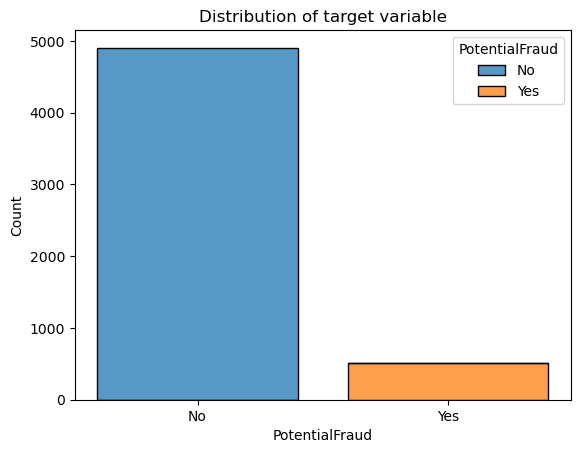

In [30]:
# Distribution of target variable
sns.histplot(data=train_df, x='PotentialFraud', hue='PotentialFraud', multiple='stack', shrink=.8)
plt.title('Distribution of target variable')
plt.show()

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare--- <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> EXPLORE</strong> --- Model --- Deliver
    </div>
</div>


## Split

In [ ]:
After understanding the data, perform the train-test split

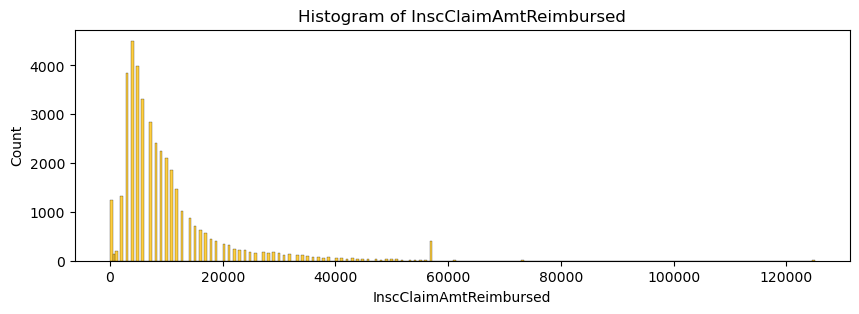

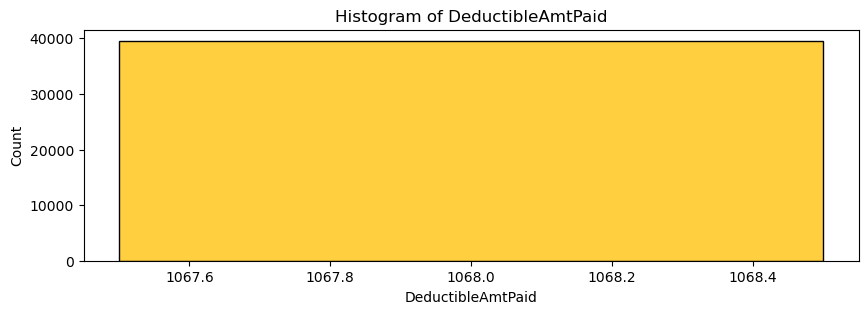

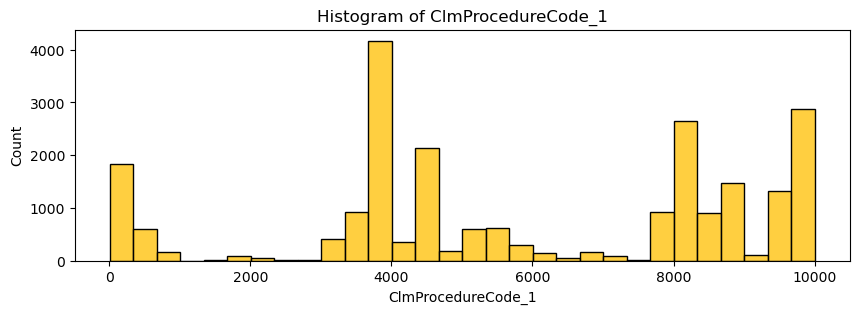

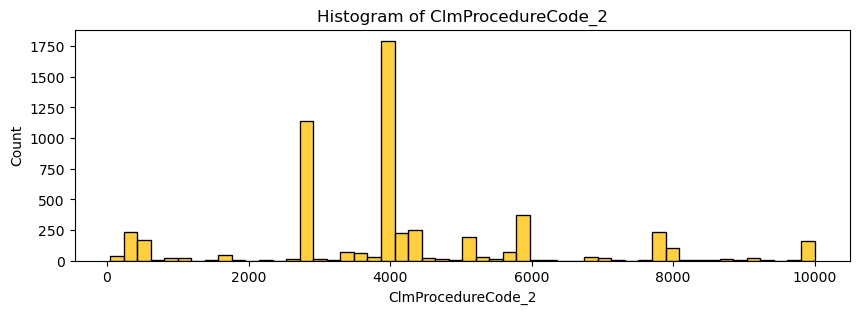

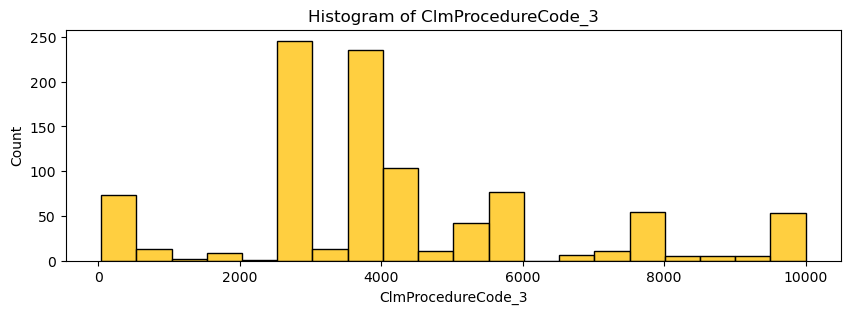

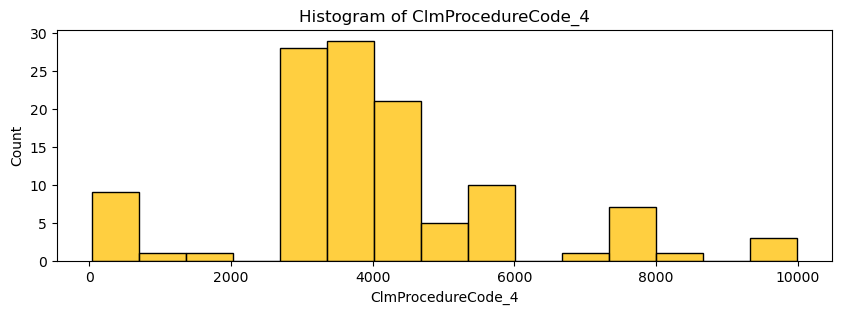

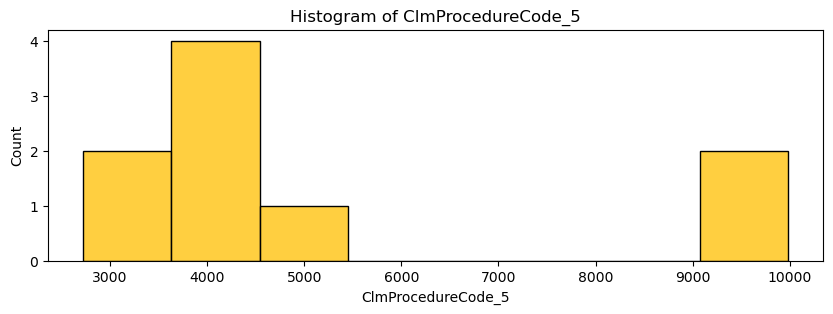

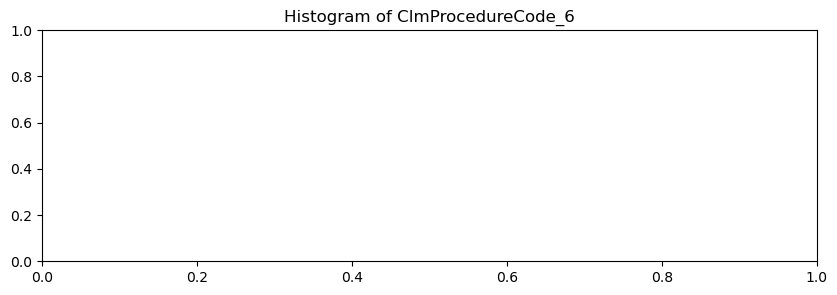

In [8]:
# Inpatient data histograms
w.display_numeric_column_histograms(train_inpatient_df)

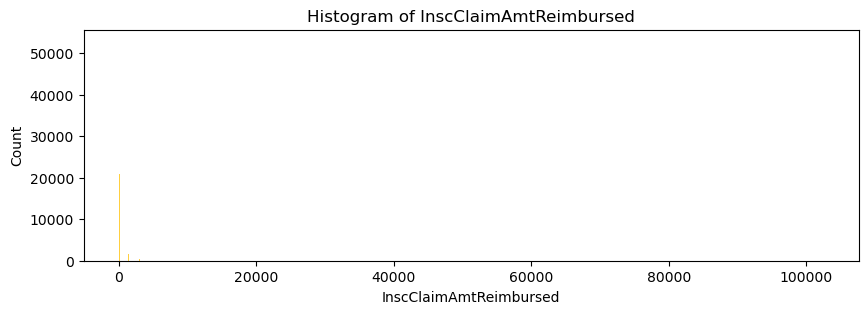

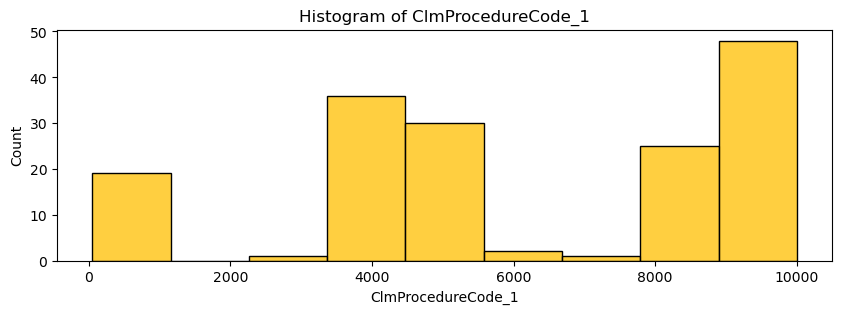

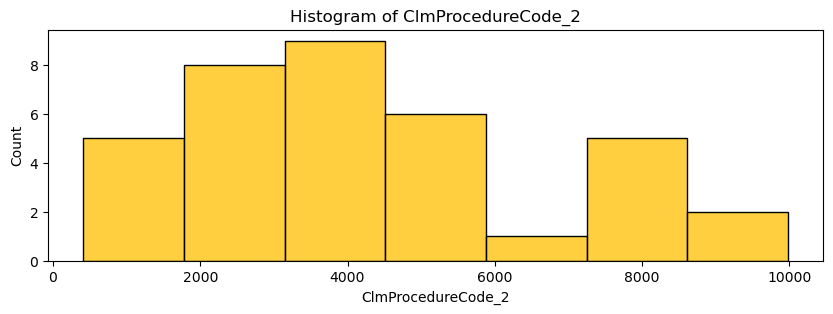

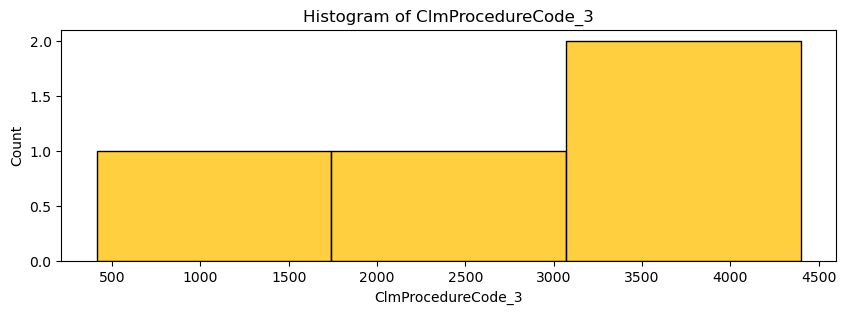

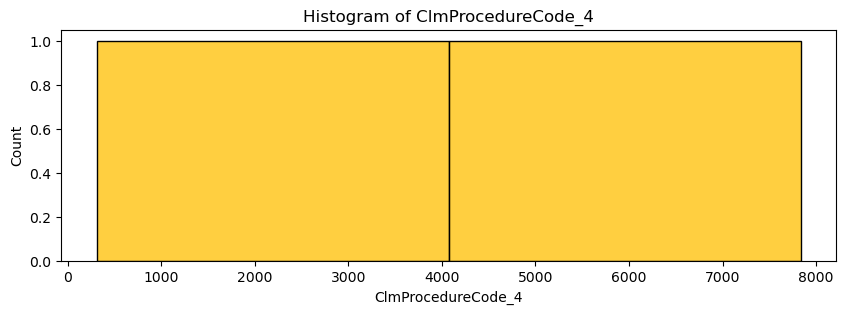

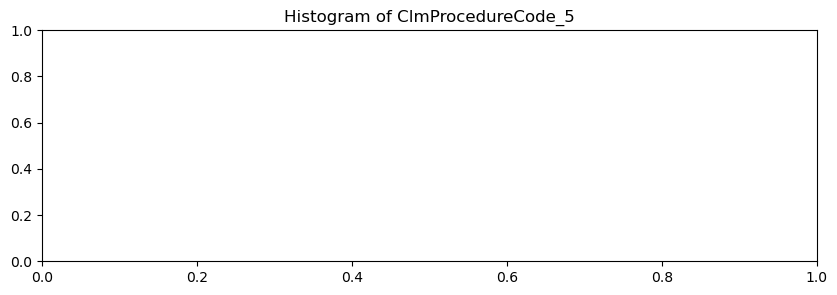

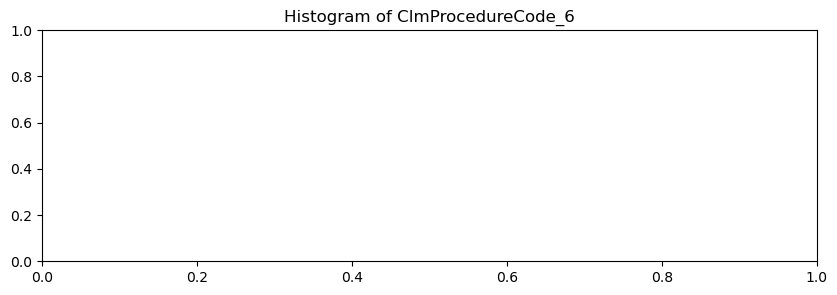

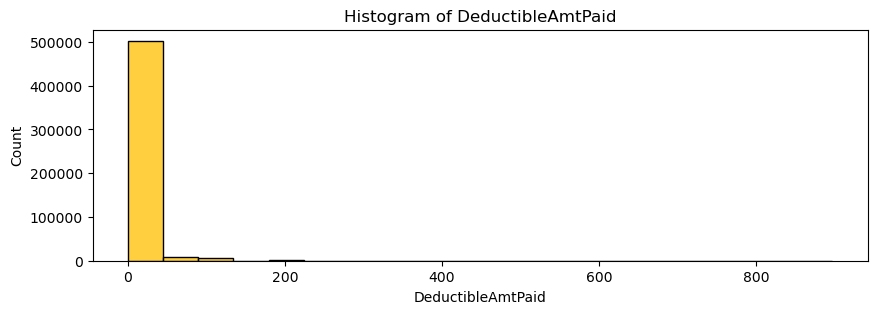

In [12]:
# Outpatient data histograms
w.display_numeric_column_histograms(train_outpatient_df)

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare---Explore <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> ---MODEL</strong>  --- Deliver
    </div>
</div>


###  Model Selection
### Tried : 
-  ### Logistic Regression
-  ###  Random Forest
-  ### K-Nearest Neighbors (KNN)
-  ### Decision Tree

<div style="background-color: darkturquoise; padding: 20px; font-size: 20px; color: white;">
    Project Pipeline:-
    <div style="background-color: rgba(255, 0, 0, 0.5);">
        - Plan ---Acquire---Prepare---Explore---Model <strong style="font-size: 18px; background-color: orange; font-weight: bold; color: white;"> ---DELIVER</strong>  
    </div>
</div>


### Model to deliver: 

## Conclusion:
 
Trained Model:
MAE: 2636.42
MSE: 55,712,688.56
    
    
    
Baseline Model:
MAE: 2827.80
MSE: 72,293,000.37.               



Test Model:
Mean Absolute Error: 2160.821729290517
Mean Squared Error: 8305312.8198176725 



Summary:- The "Test Model" with a Mean Absolute Error (MAE) of approximately 2160.82 and a Mean Squared Error (MSE) of approximately 8,305,312.82 outperforms the "Baseline Model" and the "Trained Model" on both MAE and MSE, making it the best choice against the baseline.


 

## Acctionable Recommendations:

- Implement more advanced machine learning models to predict potentially fraudulent claims.

- Take strict legal actions against fraud.  

 - Establish thorough documentation and audit trails for healthcare transactions.


## Next Steps:

 - Continuously evaluate and update fraud prevention strategies.

 - Enhance fraud detection models and algorithms.
 
 - Promote whistleblower programs and legal actions.

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

###############################################################################################################
# Implementing Logistic Regression, Random Forest, and
#  K-Nearest Neighbors (KNN) 
# classification algorithms using Python's scikit-learn library

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Evaluate models
evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")

# Feature Importance Analysis using Random Forest
#rf_model.fit(X_train, y_train)
#feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances along with their corresponding column names
#feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
#print("\nFeature Importance Analysis:")
#print(feature_importance_df)

# Plotting Feature Importance
#plt.figure(figsize=(10, 6))
#sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
#plt.title("Feature Importance Analysis")
#plt.xlabel("Importance")
#plt.ylabel("Feature")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
confusion_matrix:
---------------
[[4993    0]
 [   0 6803]]
Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
confusion_matrix:
---------------
[[4993    0]
 [   0 6803]]
Model: K-Nearest Neighbors
Accuracy: 0.9899
Precision: 0.9879
Recall: 0.9947
F1-Score: 0.9913
ROC-AUC: 0.9890
confusion_matrix:
---------------
[[4910   83]
 [  36 6767]]


In [52]:

# Analyze outpatient data
outpatient_conditions = ['chroniccond_alzheimer', 'chroniccond_heartfailure', 'chroniccond_diabetes']

outpatient_fraudsters = outpatient_df[outpatient_df['potentialfraud'] == 'Yes']
outpatient_non_fraudsters = outpatient_df[outpatient_df['potentialfraud'] == 'No']

for condition in outpatient_conditions:
    fraudsters_percentage = (outpatient_fraudsters[condition].sum() / len(outpatient_fraudsters)) * 100
    non_fraudsters_percentage = (outpatient_non_fraudsters[condition].sum() / len(outpatient_non_fraudsters)) * 100

    print(f"Outpatient - {condition} - Fraudsters: {fraudsters_percentage:.2f}%, Non-fraudsters: {non_fraudsters_percentage:.2f}%")

# Analyze inpatient data
inpatient_conditions = ['chroniccond_alzheimer', 'chroniccond_heartfailure', 'chroniccond_diabetes']

inpatient_fraudsters = inpatient_df[inpatient_df['potentialfraud'] == 'Yes']
inpatient_non_fraudsters = inpatient_df[inpatient_df['potentialfraud'] == 'No']

for condition in inpatient_conditions:
    fraudsters_percentage = (inpatient_fraudsters[condition].sum() / len(inpatient_fraudsters)) * 100
    non_fraudsters_percentage = (inpatient_non_fraudsters[condition].sum() / len(inpatient_non_fraudsters)) * 100

    print(f"Inpatient - {condition} - Fraudsters: {fraudsters_percentage:.2f}%, Non-fraudsters: {non_fraudsters_percentage:.2f}%")


Outpatient - chroniccond_alzheimer - Fraudsters: 59.28%, Non-fraudsters: 59.31%
Outpatient - chroniccond_heartfailure - Fraudsters: 40.19%, Non-fraudsters: 40.12%
Outpatient - chroniccond_diabetes - Fraudsters: 28.45%, Non-fraudsters: 28.34%
Inpatient - chroniccond_alzheimer - Fraudsters: 48.14%, Non-fraudsters: 48.14%
Inpatient - chroniccond_heartfailure - Fraudsters: 25.68%, Non-fraudsters: 26.65%
Inpatient - chroniccond_diabetes - Fraudsters: 18.12%, Non-fraudsters: 18.18%


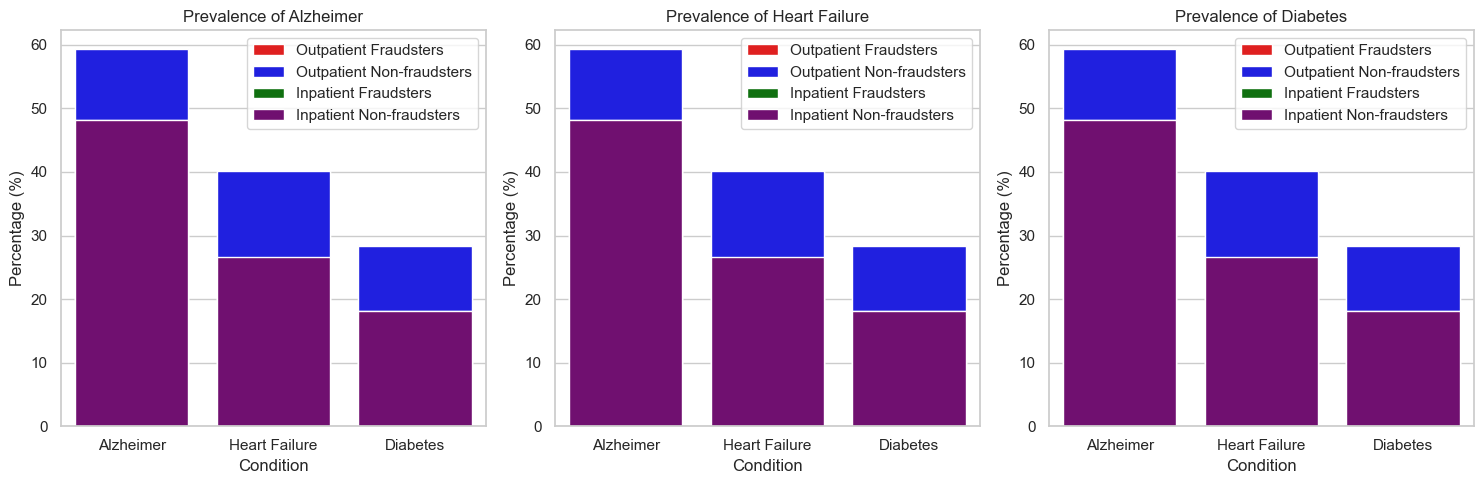

In [53]:

# Create a DataFrame to hold the prevalence data
data = {
    'Condition': ['Alzheimer', 'Heart Failure', 'Diabetes'],
    'Outpatient Fraudsters': [59.28, 40.19, 28.45],
    'Outpatient Non-fraudsters': [59.31, 40.12, 28.34],
    'Inpatient Fraudsters': [48.14, 25.68, 18.12],
    'Inpatient Non-fraudsters': [48.14, 26.65, 18.18]
}

df = pd.DataFrame(data)

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create subplots for each condition
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, condition in enumerate(['Alzheimer', 'Heart Failure', 'Diabetes']):
    sns.barplot(x='Condition', y=f'Outpatient Fraudsters', data=df, ax=axes[i], label='Outpatient Fraudsters', color='red')
    sns.barplot(x='Condition', y=f'Outpatient Non-fraudsters', data=df, ax=axes[i], label='Outpatient Non-fraudsters', color='blue')
    sns.barplot(x='Condition', y=f'Inpatient Fraudsters', data=df, ax=axes[i], label='Inpatient Fraudsters', color='green')
    sns.barplot(x='Condition', y=f'Inpatient Non-fraudsters', data=df, ax=axes[i], label='Inpatient Non-fraudsters', color='purple')

    axes[i].set_title(f'Prevalence of {condition}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].legend()

plt.tight_layout()
plt.show()


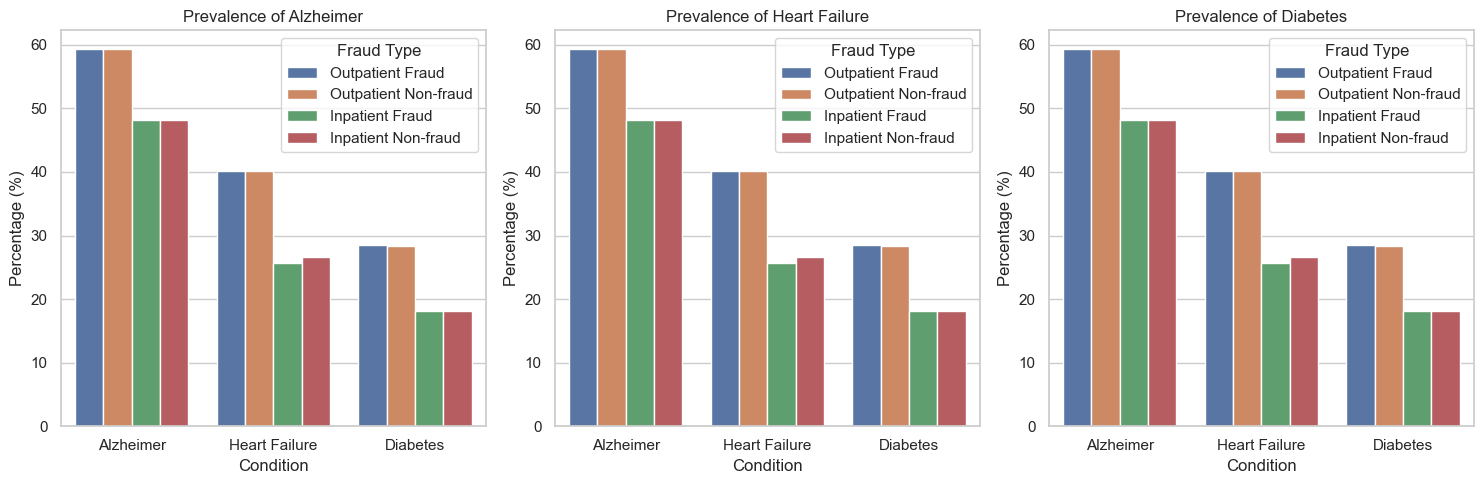

In [106]:

# Create a DataFrame to hold the prevalence data
data = {
    'Condition': ['Alzheimer', 'Heart Failure', 'Diabetes'],
    'Outpatient Fraud': [59.28, 40.19, 28.45],
    'Outpatient Non-fraud': [59.31, 40.12, 28.34],
    'Inpatient Fraud': [48.14, 25.68, 18.12],
    'Inpatient Non-fraud': [48.14, 26.65, 18.18]
}

df = pd.DataFrame(data)

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create subplots for each condition
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, condition in enumerate(['Alzheimer', 'Heart Failure', 'Diabetes']):
    ax = sns.barplot(x='Condition', y='Percentage (%)', hue='Fraud Type', data=df.melt(id_vars=['Condition'], var_name='Fraud Type', value_name='Percentage (%)'), ax=axes[i])
    ax.set_title(f'Prevalence of {condition}')
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Fraud Type')

plt.tight_layout()
plt.show()


# Take Aways 
 No fraud 

In [ ]:
########

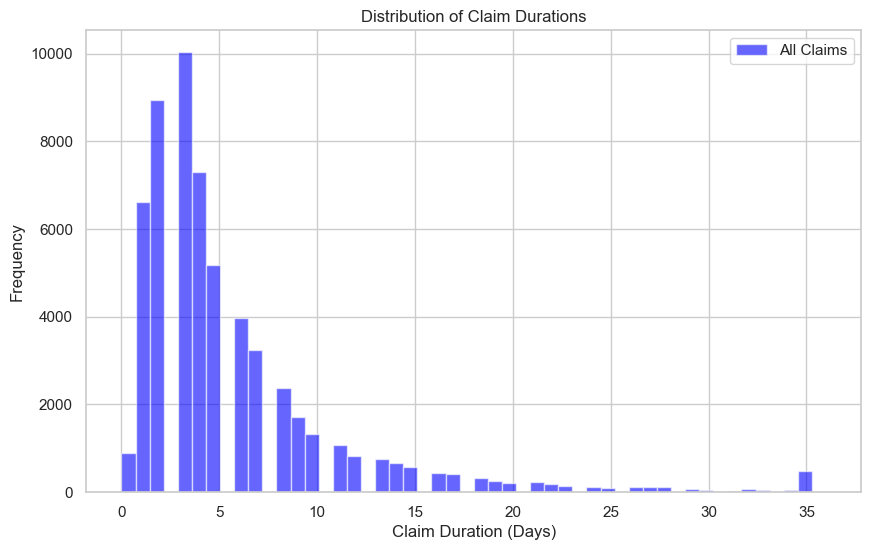

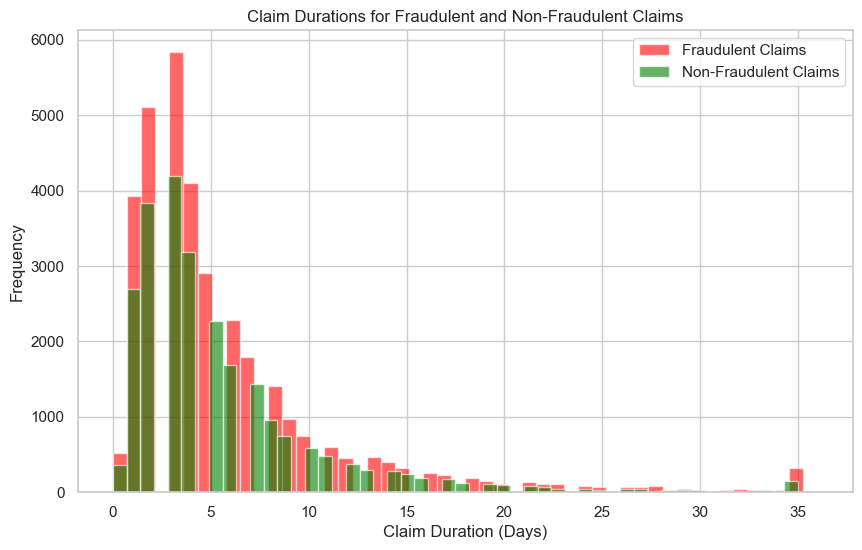

Outliers (Claims with Unusually Long or Short Durations):
       claimduration potentialfraud
82               0.0            Yes
139              0.0            Yes
371              0.0            Yes
383              0.0             No
392              0.0             No
...              ...            ...
58714            0.0            Yes
58727            0.0             No
58845            0.0             No
58848            0.0             No
58925            0.0            Yes

[887 rows x 2 columns]


In [68]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a histogram to visualize the distribution of claim durations
plt.figure(figsize=(10, 6))
plt.hist(inpatient_df['claimduration'], bins=50, color='blue', alpha=0.6, label='All Claims')
plt.title('Distribution of Claim Durations')
plt.xlabel('Claim Duration (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Identify outliers (e.g., claims with durations outside a reasonable range)
lower_duration_threshold = 1  # Adjust as needed
upper_duration_threshold = 365  # Adjust as needed

outliers = inpatient_df[
    (inpatient_df['claimduration'] < lower_duration_threshold) | (inpatient_df['claimduration'] > upper_duration_threshold)
]

# Comparison between Fraud and Non-Fraud claims' durations
fraudulent_claims = inpatient_df[inpatient_df['potentialfraud'] == 'Yes']
non_fraudulent_claims = inpatient_df[inpatient_df['potentialfraud'] == 'No']

plt.figure(figsize=(10, 6))
plt.hist(fraudulent_claims['claimduration'], bins=50, color='red', alpha=0.6, label='Fraudulent Claims')
plt.hist(non_fraudulent_claims['claimduration'], bins=50, color='green', alpha=0.6, label='Non-Fraudulent Claims')

plt.title('Claim Durations for Fraudulent and Non-Fraudulent Claims')
plt.xlabel('Claim Duration (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print information about outliers
print("Outliers (Claims with Unusually Long or Short Durations):")
print(outliers[['claimduration', 'potentialfraud']])


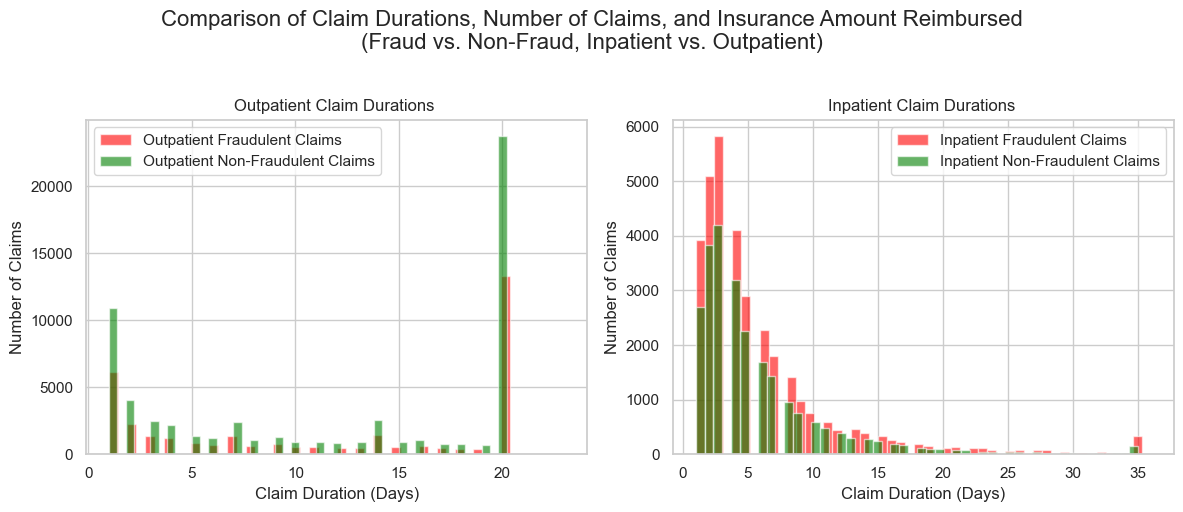

In [126]:
# Create subplots for outpatient and inpatient data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.suptitle("Comparison of Claim Durations, Number of Claims, and Insurance Amount Reimbursed\n(Fraud vs. Non-Fraud, Inpatient vs. Outpatient)", y=1.02, fontsize=16, ha='center')

# Plot outpatient data (excluding 0 days claim duration)
outpatient_fraud_claim_durations = outpatient_df[(outpatient_df['potentialfraud'] == 'Yes') & (outpatient_df['claimduration'] > 0)]['claimduration']
outpatient_non_fraud_claim_durations = outpatient_df[(outpatient_df['potentialfraud'] == 'No') & (outpatient_df['claimduration'] > 0)]['claimduration']

axes[0].hist(outpatient_fraud_claim_durations, bins=50, color='red', alpha=0.6, label='Outpatient Fraudulent Claims')
axes[0].hist(outpatient_non_fraud_claim_durations, bins=50, color='green', alpha=0.6, label='Outpatient Non-Fraudulent Claims')
axes[0].set_title('Outpatient Claim Durations ')
axes[0].set_xlabel('Claim Duration (Days)')
axes[0].set_ylabel('Number of Claims')
axes[0].legend()

# Plot inpatient data (excluding 0 days claim duration)
inpatient_fraud_claim_durations = inpatient_df[(inpatient_df['potentialfraud'] == 'Yes') & (inpatient_df['claimduration'] > 0)]['claimduration']
inpatient_non_fraud_claim_durations = inpatient_df[(inpatient_df['potentialfraud'] == 'No') & (inpatient_df['claimduration'] > 0)]['claimduration']

axes[1].hist(inpatient_fraud_claim_durations, bins=50, color='red', alpha=0.6, label='Inpatient Fraudulent Claims')
axes[1].hist(inpatient_non_fraud_claim_durations, bins=50, color='green', alpha=0.6, label='Inpatient Non-Fraudulent Claims')
axes[1].set_title('Inpatient Claim Durations ')
axes[1].set_xlabel('Claim Duration (Days)')
axes[1].set_ylabel('Number of Claims')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


Takeaways:
 -  shorter duration claims are more prone to fraud in inpatient data
 -   longer duration claims are more prone to fraud in outpatient data

In [165]:
from scipy import stats

# Perform t-test for outpatient data
t_stat_outpatient, p_value_outpatient = stats.ttest_ind(outpatient_fraud_claim_durations, outpatient_non_fraud_claim_durations)

# Perform t-test for inpatient data
t_stat_inpatient, p_value_inpatient = stats.ttest_ind(inpatient_fraud_claim_durations, inpatient_non_fraud_claim_durations)

# Print the results
print("Outpatient Data:")
print("T-statistic:", t_stat_outpatient)
print("P-value:", p_value_outpatient)

print("\nInpatient Data:")
print("T-statistic:", t_stat_inpatient)
print("P-value:", p_value_inpatient)


Outpatient Data:
T-statistic: -0.3011902177003985
P-value: 0.7632701068618862

Inpatient Data:
T-statistic: 4.592923122108005
P-value: 4.379958859055766e-06


In summary, the statistical analysis suggests that claim durations for inpatient data are significantly different between fraudulent and non-fraudulent claims. However, for outpatient data, there is no strong evidence to suggest a significant difference in claim durations between the two groups.

In [179]:
#------------------- import for splitting dataset-------------------
from sklearn.model_selection import train_test_split
# ------------------- Split dataset into three -------------------


def split_function(df, target_varible):
    """
    The function split_data splits the original DataFrame df into training, validate and 
    test sets using the train_test_split function from the library Scikit-Learn(machine learning library in
    Python that provides tools for data preprocessing, model selection, training and evaluation).
    """
    train, test = train_test_split(df,
                                   random_state=123,
                                   test_size=.20,
                                   stratify= df[target_varible])
    
    train, validate = train_test_split(train,
                                   random_state=123,
                                   test_size=.25,
                                   stratify= train[target_varible])
    return train, validate, test
# -

In [180]:
# Split data into three parts train,validate and test set (before the start of exploration) 
# Training Set (train): Approximately 60% of the original dataset (20% of 80%)
# Validation Set (validate): Approximately 15% of the original dataset (25% of 60%)
# Test Set (test): Approximately 20% of the original dataset
train, validate, test = split_function(inpatient_df, 'potentialfraud')


In [171]:
train.size

2264832

In [172]:
test.size

755008

In [173]:
validate.size

754944

In [174]:
inpatient_df.columns

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'admissiondt', 'clmadmitdiagnosiscode', 'deductibleamtpaid',
       'dischargedt', 'diagnosisgro

In [178]:
inpatient_df.head(2)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud,fraud_status
0,BENE11001,0,0,0,39,230,12,12,0,1,...,19889,5849,00000,000,000,000,6.0,3.0,Yes,1
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,7092.0,000,000,2.0,3.0,No,0


In [182]:
#list includes columns that are being excluded from the dataset
#keeping total charges
# For training set
columns_to_drop =['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'admissiondt', 'clmadmitdiagnosiscode', 'deductibleamtpaid',
       'dischargedt', 'diagnosisgroupcode', 'clmdiagnosiscode_1',
       'clmdiagnosiscode_2', 'clmdiagnosiscode_3', 'clmdiagnosiscode_4',
       'clmdiagnosiscode_5', 'clmdiagnosiscode_6', 'clmdiagnosiscode_7',
       'clmdiagnosiscode_8', 'clmdiagnosiscode_9', 'clmdiagnosiscode_10',
       'clmprocedurecode_1', 'clmprocedurecode_2', 'clmprocedurecode_3',
       'numphysicians', 'potentialfraud', 'fraud_status']


#prepares the training, validation, and testing datasets 
#by selecting specific columns and target variable for each set

X_train = train.drop(columns=columns_to_drop)
y_train = train['fraud_status']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['fraud_status']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['fraud_status']


In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

###############################################################################################################
# Implementing Logistic Regression, Random Forest, and
#  K-Nearest Neighbors (KNN) 
# classification algorithms using Python's scikit-learn library

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

# Evaluate models
evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")

# Feature Importance Analysis using Random Forest
#rf_model.fit(X_train, y_train)
#feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances along with their corresponding column names
#feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
#print("\nFeature Importance Analysis:")
#print(feature_importance_df)

# Plotting Feature Importance
#plt.figure(figsize=(10, 6))
#sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
#plt.title("Feature Importance Analysis")
#plt.xlabel("Importance")
#plt.ylabel("Feature")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


Model: Logistic Regression
Accuracy: 0.5767
Precision: 0.5767
Recall: 1.0000
F1-Score: 0.7315
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[   0 4993]
 [   0 6803]]
Model: Random Forest
Accuracy: 0.5767
Precision: 0.5767
Recall: 1.0000
F1-Score: 0.7315
ROC-AUC: 0.5000
confusion_matrix:
---------------
[[   0 4993]
 [   0 6803]]
Model: K-Nearest Neighbors
Accuracy: 0.5645
Precision: 0.5781
Recall: 0.9067
F1-Score: 0.7060
ROC-AUC: 0.5025
confusion_matrix:
---------------
[[ 491 4502]
 [ 635 6168]]


In [130]:

# Filter for fraud and non-fraud cases
fraudulent_claims = inpatient_df[inpatient_df['potentialfraud'] == 'Yes']
non_fraudulent_claims = inpatient_df[inpatient_df['potentialfraud'] == 'No']

# Find the top 6 claim durations for fraud and non-fraud cases
top6_fraud_claim_durations = fraudulent_claims['claimduration'].nlargest(6)
top6_non_fraud_claim_durations = non_fraudulent_claims['claimduration'].nlargest(6)

# Find the top 5 insurance amounts reimbursed for fraud and non-fraud cases
top5_fraud_insurance_reimbursed = fraudulent_claims['inscclaimamtreimbursed'].nlargest(5)
top5_non_fraud_insurance_reimbursed = non_fraudulent_claims['inscclaimamtreimbursed'].nlargest(5)

# Display the results
print("Top 6 Claim Durations for Fraudulent Claims:")
print(top6_fraud_claim_durations)
print("\nTop 6 Claim Durations for Non-Fraudulent Claims:")
print(top6_non_fraud_claim_durations)

print("\nTop 5 Insurance Amounts Reimbursed for Fraudulent Claims:")
print(top5_fraud_insurance_reimbursed)
print("\nTop 5 Insurance Amounts Reimbursed for Non-Fraudulent Claims:")
print(top5_non_fraud_insurance_reimbursed)


Top 6 Claim Durations for Fraudulent Claims:
45560    36.0
58119    36.0
19       35.0
44       35.0
273      35.0
476      35.0
Name: claimduration, dtype: float64

Top 6 Claim Durations for Non-Fraudulent Claims:
456     35.0
1000    35.0
3123    35.0
3987    35.0
5511    35.0
6127    35.0
Name: claimduration, dtype: float64

Top 5 Insurance Amounts Reimbursed for Fraudulent Claims:
1474     125000.0
38631    125000.0
52541    125000.0
58021    125000.0
1714     124000.0
Name: inscclaimamtreimbursed, dtype: float64

Top 5 Insurance Amounts Reimbursed for Non-Fraudulent Claims:
41400    125000.0
40314    118000.0
25045    103000.0
24523    102000.0
45234    102000.0
Name: inscclaimamtreimbursed, dtype: float64


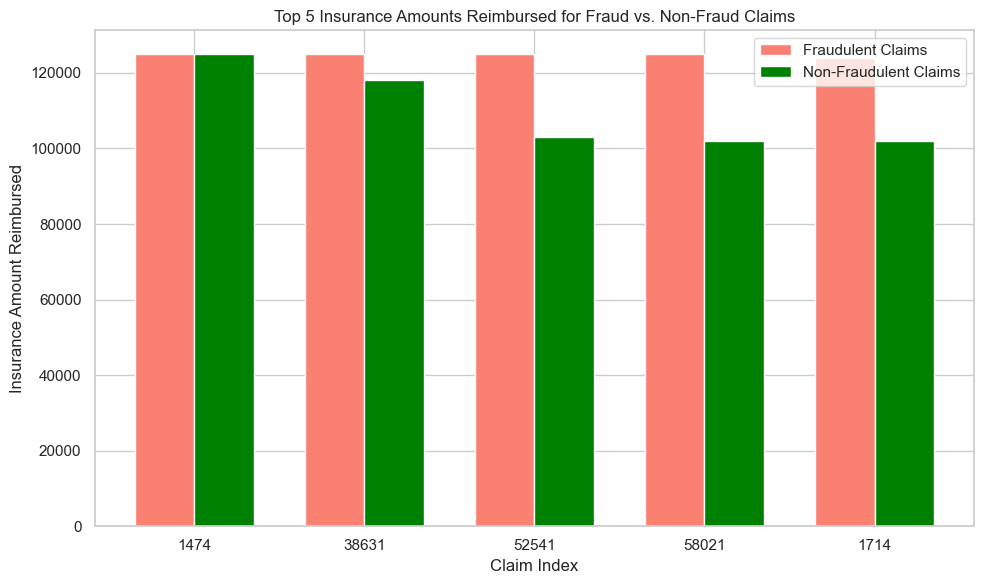

In [139]:
# Get the top 5 insurance amounts reimbursed for fraud claims
top5_fraud_reimbursed = inpatient_df[inpatient_df['potentialfraud'] == 'Yes']['inscclaimamtreimbursed'].nlargest(5)

# Get the top 5 insurance amounts reimbursed for non-fraud claims
top5_non_fraud_reimbursed = inpatient_df[inpatient_df['potentialfraud'] == 'No']['inscclaimamtreimbursed'].nlargest(5)

# Create an array for the claim indices
claim_indices = np.arange(5)

# Set the width of the bars
bar_width = 0.35

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for fraud claims
ax.bar(claim_indices, top5_fraud_reimbursed, bar_width, color='salmon', label='Fraudulent Claims')

# Plot the bars for non-fraud claims
ax.bar(claim_indices + bar_width, top5_non_fraud_reimbursed, bar_width, color='green', label='Non-Fraudulent Claims')

# Set the labels, title, and legend
ax.set_xlabel('Claim Index')
ax.set_ylabel('Insurance Amount Reimbursed')
ax.set_title('Top 5 Insurance Amounts Reimbursed for Fraud vs. Non-Fraud Claims')
ax.set_xticks(claim_indices + bar_width / 2)
ax.set_xticklabels(top5_fraud_reimbursed.index)
ax.legend()

# Show the grouped bar chart
plt.tight_layout()
plt.show()


In [141]:
# Group the data by provider and sum the reimbursed amount
provider_reimbursed = inpatient_df.groupby('provider')['inscclaimamtreimbursed'].sum().reset_index()

# Sort the providers by total reimbursed amount in descending order
top_providers = provider_reimbursed.sort_values(by='inscclaimamtreimbursed', ascending=False).head(5)

# Display the top 5 providers
print(top_providers)


      provider  inscclaimamtreimbursed
388   PRV52019               9137270.0
1408  PRV55462               6395100.0
1066  PRV54367               4537300.0
1355  PRV55209               4089100.0
1361  PRV55230               3945400.0


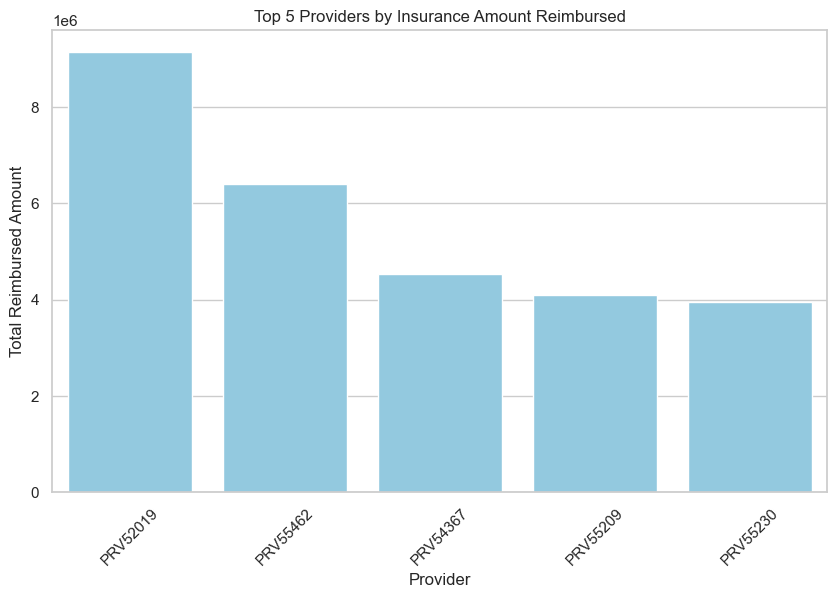

In [143]:

# Group the data by provider and sum the reimbursed amount
provider_reimbursed = inpatient_df.groupby('provider')['inscclaimamtreimbursed'].sum().reset_index()

# Sort the providers by total reimbursed amount in descending order
top_providers = provider_reimbursed.sort_values(by='inscclaimamtreimbursed', ascending=False).head(5)

# Set Seaborn style and palette
sns.set(style="whitegrid")
sns.set_palette("Dark2")

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top_providers, x='provider', y='inscclaimamtreimbursed', color='skyblue')
plt.title('Top 5 Providers by Insurance Amount Reimbursed')
plt.xlabel('Provider')
plt.ylabel('Total Reimbursed Amount')
plt.xticks(rotation=45)
plt.show()


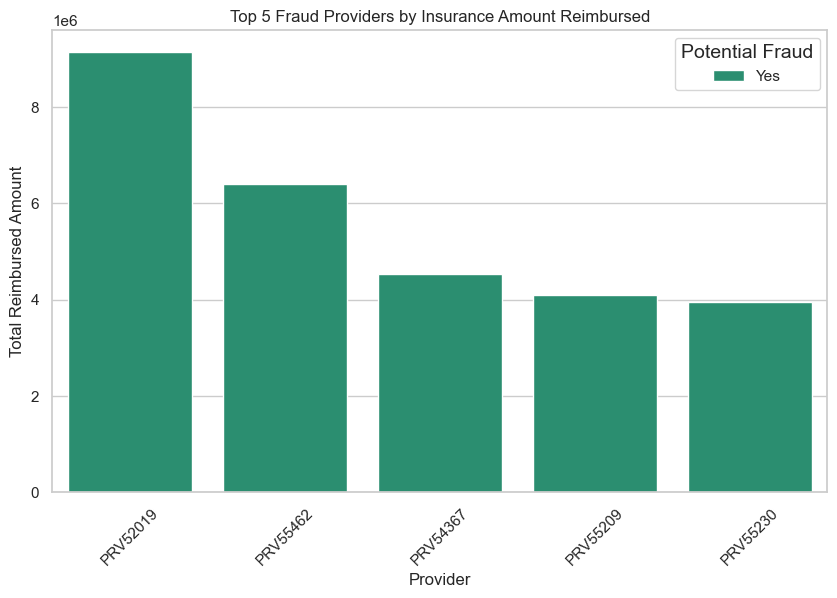

In [144]:

# Filter the data for fraud providers
fraud_providers = inpatient_df[inpatient_df['potentialfraud'] == 'Yes']

# Group the data by provider and sum the reimbursed amount for fraud and non-fraud
provider_reimbursed = fraud_providers.groupby(['provider', 'potentialfraud'])['inscclaimamtreimbursed'].sum().reset_index()

# Sort the providers by total reimbursed amount in descending order
top_providers = provider_reimbursed.sort_values(by='inscclaimamtreimbursed', ascending=False).head(5)

# Set Seaborn style and palette
sns.set(style="whitegrid")
sns.set_palette("Dark2")

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=top_providers, x='provider', y='inscclaimamtreimbursed', hue='potentialfraud')
plt.title('Top 5 Fraud Providers by Insurance Amount Reimbursed')
plt.xlabel('Provider')
plt.ylabel('Total Reimbursed Amount')
plt.xticks(rotation=45)
plt.legend(title="Potential Fraud", title_fontsize='14')
plt.show()


/var/folders/hc/k8h5rkb97cx0qgd8n8r5rr9r0000gn/T/ipykernel_36228/1970076193.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=claim_counts, x='count', y='potentialfraud', ci=None)


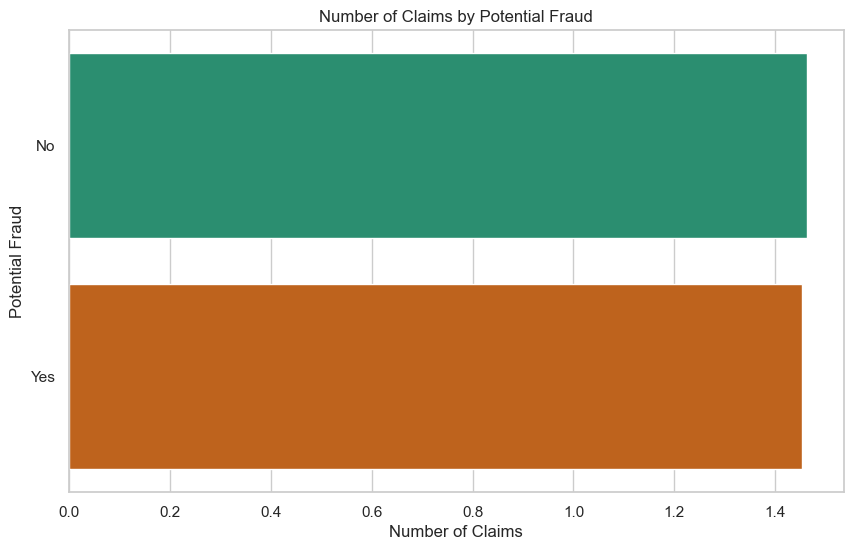

In [147]:

# Group the data by 'claimid' and 'potentialfraud', and count the occurrences
claim_counts = inpatient_df.groupby(['claimid', 'potentialfraud']).size().reset_index(name='count')

# Set Seaborn style and palette
sns.set(style="whitegrid")
sns.set_palette("Dark2")

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=claim_counts, x='count', y='potentialfraud', ci=None)
plt.title('Number of Claims by Potential Fraud')
plt.xlabel('Number of Claims')
plt.ylabel('Potential Fraud')
plt.show()


In [151]:
# find the repeated claim ids by providers
claim_counts = inpatient_df.groupby(['claimid', 'provider']).size().reset_index(name='count')
claim_counts = claim_counts[claim_counts['count'] > 1]
print(claim_counts)
# maximum number of repeated claims by a provider
print(claim_counts['count'].max())
# minimum number of repeated claims by a provider
print(claim_counts['count'].min())
# average number of repeated claims by a provider
print(claim_counts['count'].mean())

claim_counts = inpatient_df.groupby(['claimid']).size().reset_index(name='count')
claim_counts = claim_counts[claim_counts['count'] > 1]
print("Claim Counts:")
print(claim_counts)


        claimid  provider  count
0      CLM31001  PRV55832      2
4      CLM31007  PRV52396      2
5      CLM31008  PRV55812      2
6      CLM31009  PRV53005      2
8      CLM31013  PRV56668      2
...         ...       ...    ...
40464  CLM82210  PRV53461      2
40465  CLM82211  PRV54065      2
40466  CLM82212  PRV54111      2
40472  CLM82219  PRV57409      2
40473  CLM82220  PRV57547      2

[18507 rows x 3 columns]
2
2
2.0
Claim Counts:
        claimid  count
0      CLM31001      2
4      CLM31007      2
5      CLM31008      2
6      CLM31009      2
8      CLM31013      2
...         ...    ...
40464  CLM82210      2
40465  CLM82211      2
40466  CLM82212      2
40472  CLM82219      2
40473  CLM82220      2

[18507 rows x 2 columns]


In [152]:

# Group the data by primary doctor(inpatient) and sum the reimbursed amounts
doctor_reimbursements = inpatient_df.groupby('attendingphysician')['inscclaimamtreimbursed'].sum().reset_index()

# Sort the doctors by total reimbursed amount in descending order
top_doctors = doctor_reimbursements.sort_values(by='inscclaimamtreimbursed', ascending=False).head(10)

# Display the top 10 doctors and their reimbursement amounts
print("Top 10 Doctors with the Highest Reimbursement Amounts:")
print(top_doctors)


Top 10 Doctors with the Highest Reimbursement Amounts:
      attendingphysician  inscclaimamtreimbursed
10441          PHY422134               6395100.0
2883           PHY341560               4079100.0
11312          PHY431177               2967000.0
348            PHY315112               2956600.0
11194          PHY429938               2857500.0
4931           PHY362864               2636400.0
11184          PHY429828               2566000.0
8343           PHY400274               2515380.0
1719           PHY329774               2469800.0
9458           PHY411541               2376200.0


### The top 10 primary doctors by their total reimbursement amount

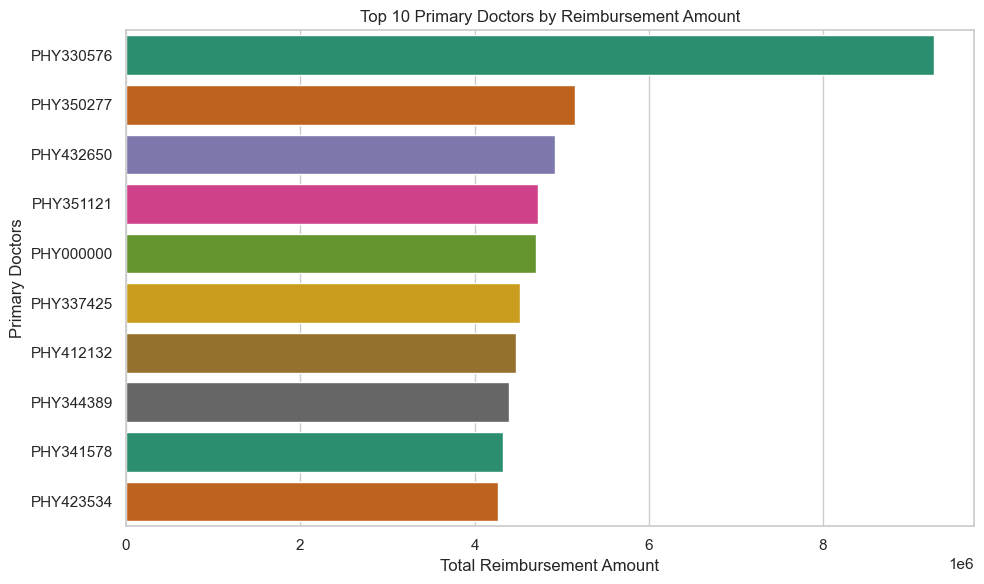

In [190]:
# Group the data by primary doctor and calculate the total reimbursement amount
top_doctors = outpatient_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_doctors.values, y=top_doctors.index, palette='Dark2')

plt.xlabel('Total Reimbursement Amount')
plt.ylabel('Primary Doctors')
plt.title('Top 10 Primary Doctors by Reimbursement Amount')
plt.tight_layout()

plt.show()


### The top 10 primary doctors' total reimbursement amounts for fraud and non-fraud cases

# Filter the data into fraud and non-fraud cases
fraud_df = outpatient_df[outpatient_df['potentialfraud'] == 'Yes']
non_fraud_df = outpatient_df[outpatient_df['potentialfraud'] == 'No']

# Group the data by primary doctor and calculate the total reimbursement amount
fraud_top_doctors = fraud_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)
non_fraud_top_doctors = non_fraud_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)

# Create a bar chart for fraud cases
plt.figure(figsize=(12, 6))
plt.bar(fraud_top_doctors.index, fraud_top_doctors.values, label='Fraud Cases', color='orange')

# Create a bar chart for non-fraud cases
plt.bar(non_fraud_top_doctors.index, non_fraud_top_doctors.values, label='Non-Fraud Cases', color='green', alpha=0.5)

plt.xlabel('Primary Doctors')
plt.ylabel('Total Reimbursement Amount')
plt.title('Top 10 Primary Doctors by Reimbursement Amount (Fraud vs. Non-Fraud)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### The top 10 primary doctors' total reimbursement amounts for fraud and non-fraud cases

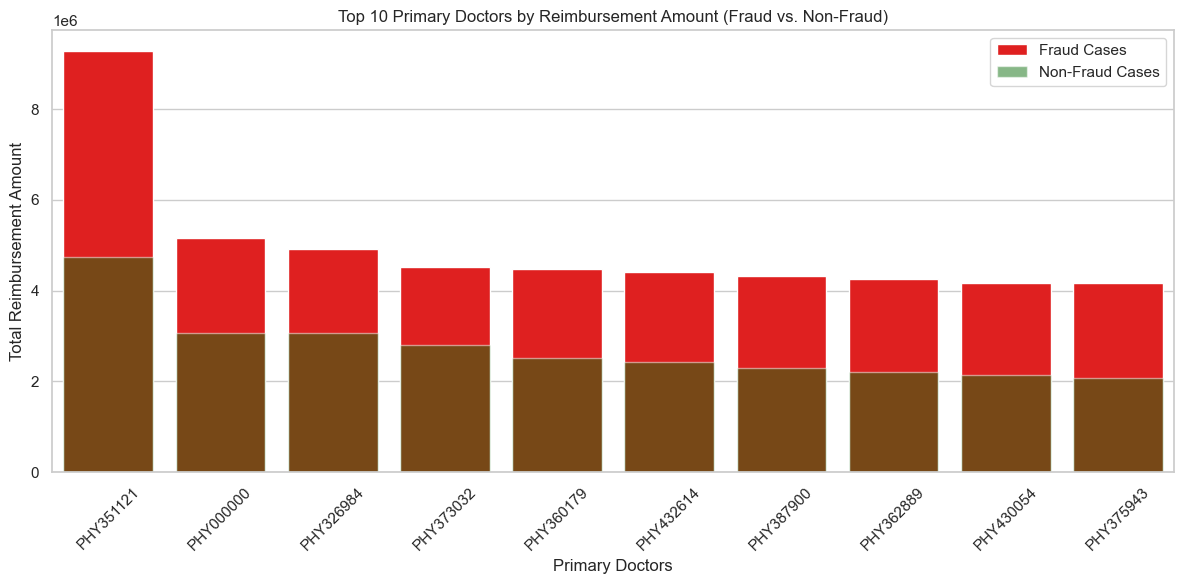

In [192]:
# Filter the data into fraud and non-fraud cases
fraud_df = outpatient_df[outpatient_df['potentialfraud'] == 'Yes']
non_fraud_df = outpatient_df[outpatient_df['potentialfraud'] == 'No']

# Group the data by primary doctor and calculate the total reimbursement amount
fraud_top_doctors = fraud_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)
non_fraud_top_doctors = non_fraud_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_top_doctors.index, y=fraud_top_doctors.values, color='red', label='Fraud Cases')
sns.barplot(x=non_fraud_top_doctors.index, y=non_fraud_top_doctors.values, color='green', alpha=0.5, label='Non-Fraud Cases')

plt.xlabel('Primary Doctors')
plt.ylabel('Total Reimbursement Amount')
plt.title('Top 10 Primary Doctors by Reimbursement Amount (Fraud vs. Non-Fraud)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


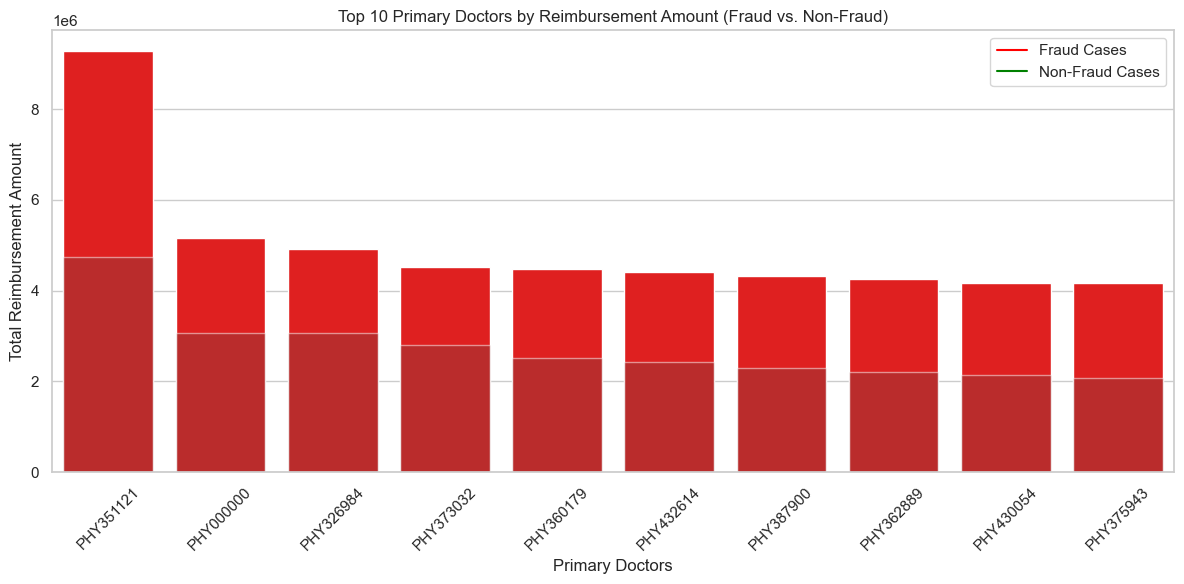

In [196]:
# Filter the data into fraud and non-fraud cases
fraud_df = outpatient_df[outpatient_df['potentialfraud'] == 'Yes']
non_fraud_df = outpatient_df[outpatient_df['potentialfraud'] == 'No']

# Group the data by primary doctor and calculate the total reimbursement amount
fraud_top_doctors = fraud_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)
non_fraud_top_doctors = non_fraud_df.groupby('attendingphysician')['opannualreimbursementamt'].sum().nlargest(10)

# Create a bar chart using Seaborn for fraud cases
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_top_doctors.index, y=fraud_top_doctors.values, color='red', label='Fraud Cases')

# Create a bar chart using Seaborn for non-fraud cases
sns.barplot(x=non_fraud_top_doctors.index, y=non_fraud_top_doctors.values, color='brown', alpha=0.5, label='Non-Fraud Cases')

plt.xlabel('Primary Doctors')
plt.ylabel('Total Reimbursement Amount')
plt.title('Top 10 Primary Doctors by Reimbursement Amount (Fraud vs. Non-Fraud)')
plt.xticks(rotation=45)

# Set the legend manually with the desired colors
red_patch = plt.Line2D([0], [0], color='red', label='Fraud Cases')
green_patch = plt.Line2D([0], [0], color='green', label='Non-Fraud Cases')
plt.legend(handles=[red_patch, green_patch])

plt.tight_layout()
plt.show()


import pandas as pd

# Filter for fraud and non-fraud cases
fraudulent_claims = inpatient_df[inpatient_df['potentialfraud'] == 'Yes']
non_fraudulent_claims = inpatient_df[inpatient_df['potentialfraud'] == 'No']

# Find the top 6 claim durations for fraud and non-fraud cases
top6_fraud_claim_durations = fraudulent_claims['claimduration'].nlargest(6)
top6_non_fraud_claim_durations = non_fraudulent_claims['claimduration'].nlargest(6)

# Find the top 5 insurance amounts reimbursed for fraud and non-fraud cases
top5_fraud_insurance_reimbursed = fraudulent_claims['inscclaimamtreimbursed'].nlargest(5)
top5_non_fraud_insurance_reimbursed = non_fraudulent_claims['inscclaimamtreimbursed'].nlargest(5)

# Display the results
print("Top 6 Claim Durations for Fraudulent Claims:")
print(top6_fraud_claim_durations)
print("\nTop 6 Claim Durations for Non-Fraudulent Claims:")
print(top6_non_fraud_claim_durations)

print("\nTop 5 Insurance Amounts Reimbursed for Fraudulent Claims:")
print(top5_fraud_insurance_reimbursed)
print("\nTop 5 Insurance Amounts Reimbursed for Non-Fraudulent Claims:")
print(top5_non_fraud_insurance_reimbursed)


In [ ]:
# Takeaways:
### there is strong evidence to suggest that the average claim 
# duration for fraudulent claims is not the same as the average
#  claim duration for non-fraudulent claims. In other words, 
# there is a statistically significant difference between these
#  two groups.



In [ ]:
########################

In [47]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Modeling

In [ ]:
####### Provider-Patient Connections

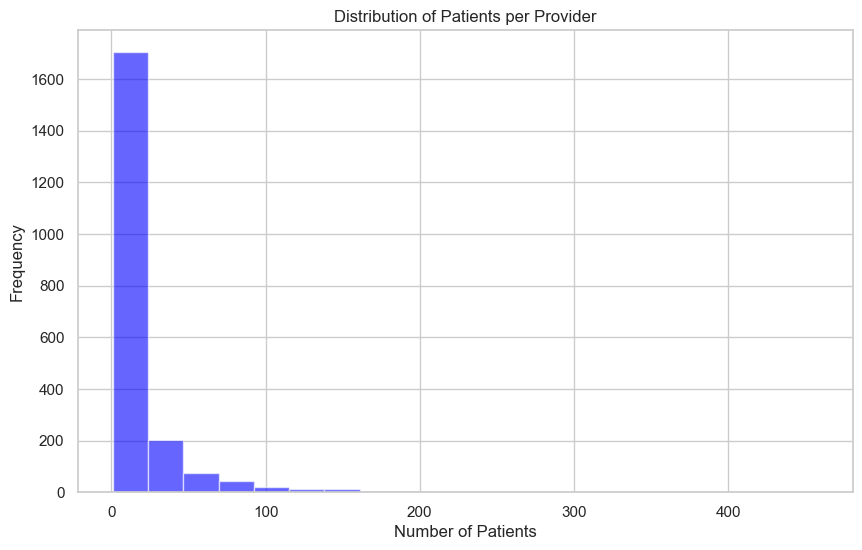

In [71]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the number of patients per provider
patients_per_provider = inpatient_df.groupby('provider')['beneid'].nunique()

# Calculate the number of providers per patient
providers_per_patient = inpatient_df.groupby('beneid')['beneid'].nunique()

# Visualize the distribution of patients per provider
plt.figure(figsize=(10, 6))
plt.hist(patients_per_provider, bins=20, color='blue', alpha=0.6)
plt.title('Distribution of Patients per Provider')
plt.xlabel('Number of Patients')
plt.ylabel('Frequency')
plt.show()


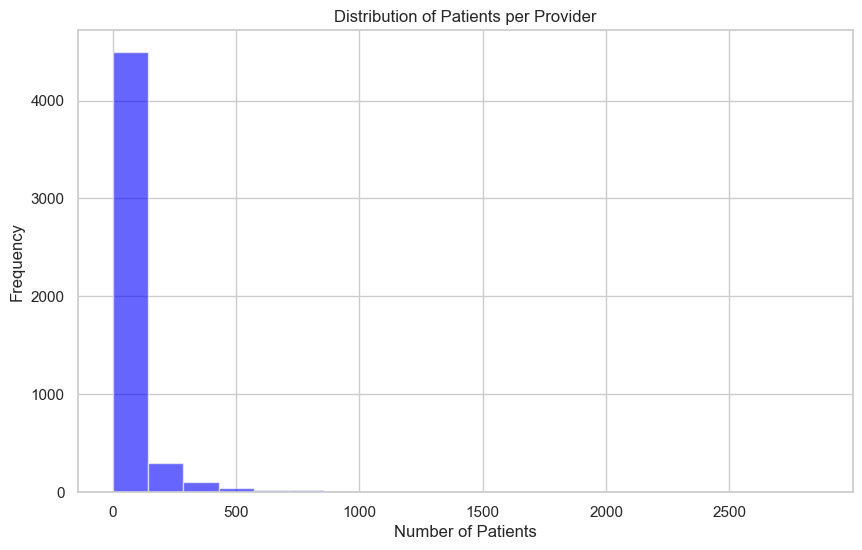

In [72]:
# Calculate the number of patients per provider
patients_per_provider = outpatient_df.groupby('provider')['beneid'].nunique()

# Calculate the number of providers per patient
providers_per_patient = outpatient_df.groupby('beneid')['beneid'].nunique()

# Visualize the distribution of patients per provider
plt.figure(figsize=(10, 6))
plt.hist(patients_per_provider, bins=20, color='blue', alpha=0.6)
plt.title('Distribution of Patients per Provider')
plt.xlabel('Number of Patients')
plt.ylabel('Frequency')
plt.show()


import geopandas as gpd
import matplotlib.pyplot as plt

# Load the U.S. state and county shapefile
shapefile_path = 'path_to_us_counties_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Merge your data with the geospatial shapefile based on 'state' and 'county' columns
merged_gdf = gdf.merge(county_counts, left_on=['STUSPS', 'NAME'], right_on=['state', 'county'], how='left')

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.boundary.plot(ax=ax, linewidth=0.5, color='k')
merged_gdf.plot(column='Provider ID', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Provider Distribution by County')
plt.show()


In [77]:
# Group your dataset and count the number of providers and patients in each county
county_counts = outpatient_df.groupby(['state', 'county']).agg({'provider': 'count', 'beneid': 'count'}).reset_index()
county_counts


,state,county,provider,beneid
0,1,0,96,96
1,1,10,598,598
2,1,20,127,127
3,1,30,35,35
4,1,40,73,73
...,...,...,...,...
3095,54,770,66,66
3096,54,830,29,29
3097,54,870,1,1
3098,54,880,2,2


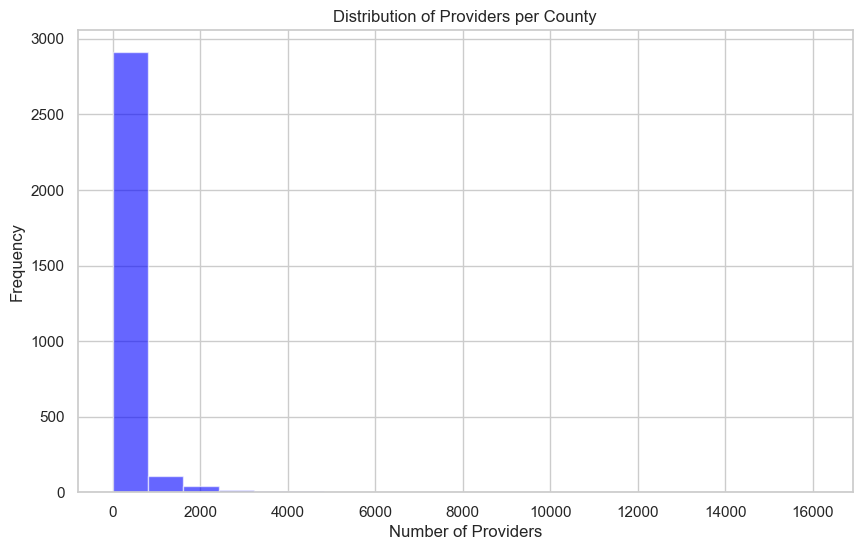

In [83]:
# Visualize the distribution of providers per county
plt.figure(figsize=(10, 6))
plt.hist(county_counts['provider'], bins=20, color='blue', alpha=0.6)
plt.title('Distribution of Providers per County')
plt.xlabel('Number of Providers')
plt.ylabel('Frequency')
plt.show()

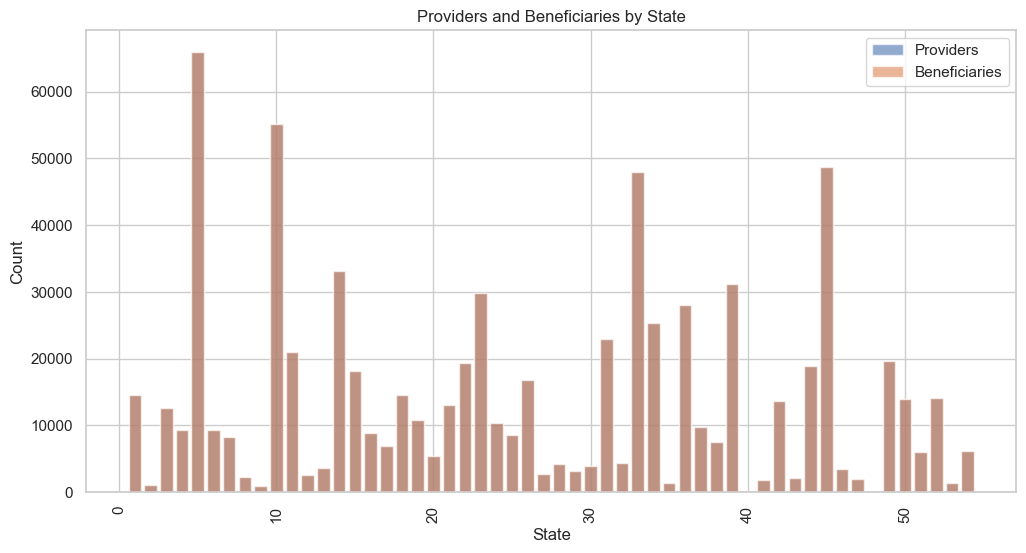

In [84]:
state_counts = county_counts.groupby('state').agg({'provider': 'sum', 'beneid': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
plt.bar(state_counts['state'], state_counts['provider'], label='Providers', alpha=0.6)
plt.bar(state_counts['state'], state_counts['beneid'], label='Beneficiaries', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Providers and Beneficiaries by State')
plt.legend()
plt.xticks(rotation=90)
plt.show()


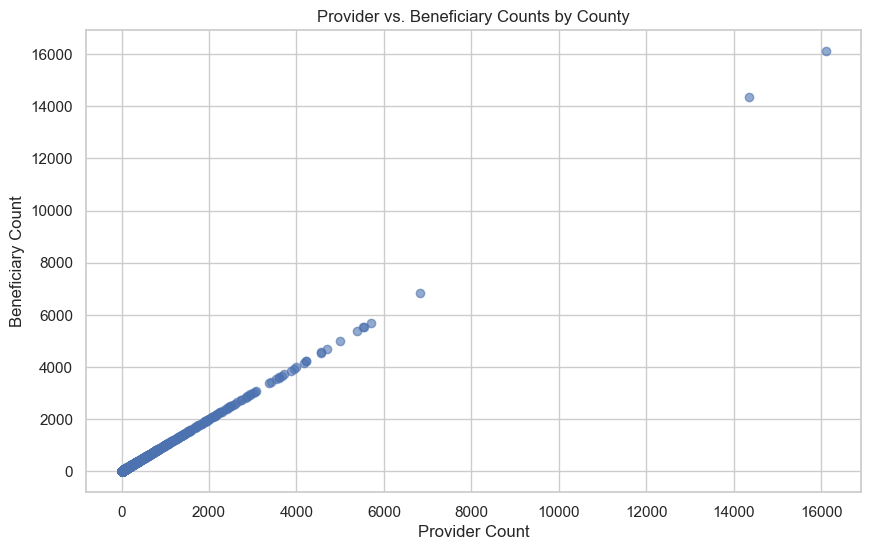

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(county_counts['provider'], county_counts['beneid'], alpha=0.6)
plt.xlabel('Provider Count')
plt.ylabel('Beneficiary Count')
plt.title('Provider vs. Beneficiary Counts by County')
plt.show()


### Bar Chart of Fraudulent and Non-Fraudulent Providers by State for outpatient

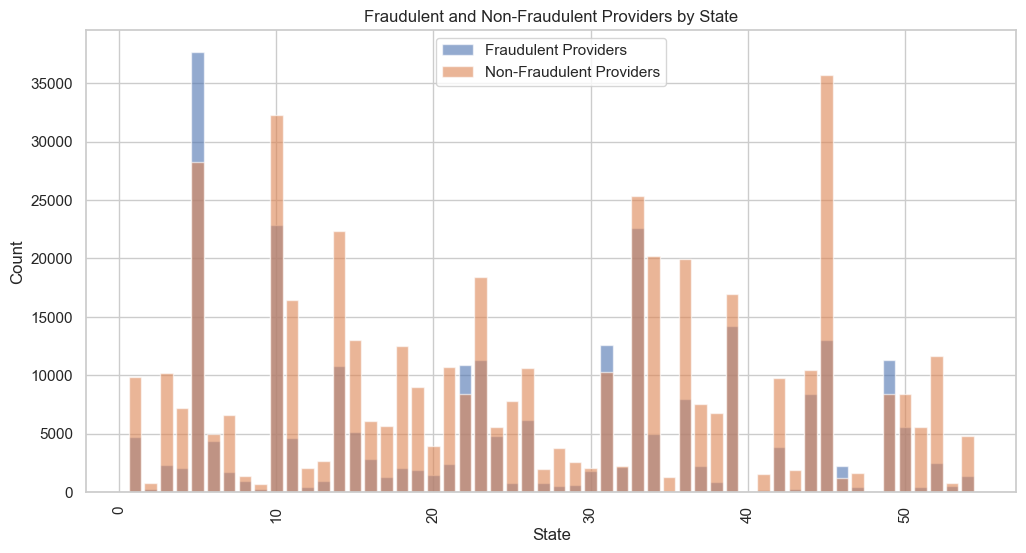

In [87]:
# Bar Chart of Fraudulent and Non-Fraudulent Providers by State
state_fraud_counts = outpatient_df[outpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()
state_nonfraud_counts = outpatient_df[outpatient_df['potentialfraud'] == 'No'].groupby('state')['provider'].count()

plt.figure(figsize=(12, 6))
plt.bar(state_fraud_counts.index, state_fraud_counts, label='Fraudulent Providers', alpha=0.6)
plt.bar(state_nonfraud_counts.index, state_nonfraud_counts, label='Non-Fraudulent Providers', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Fraudulent and Non-Fraudulent Providers by State')
plt.legend()
plt.xticks(rotation=90)
plt.show()


### Bar Chart of Fraudulent and Non-Fraudulent Providers by State for inpatient

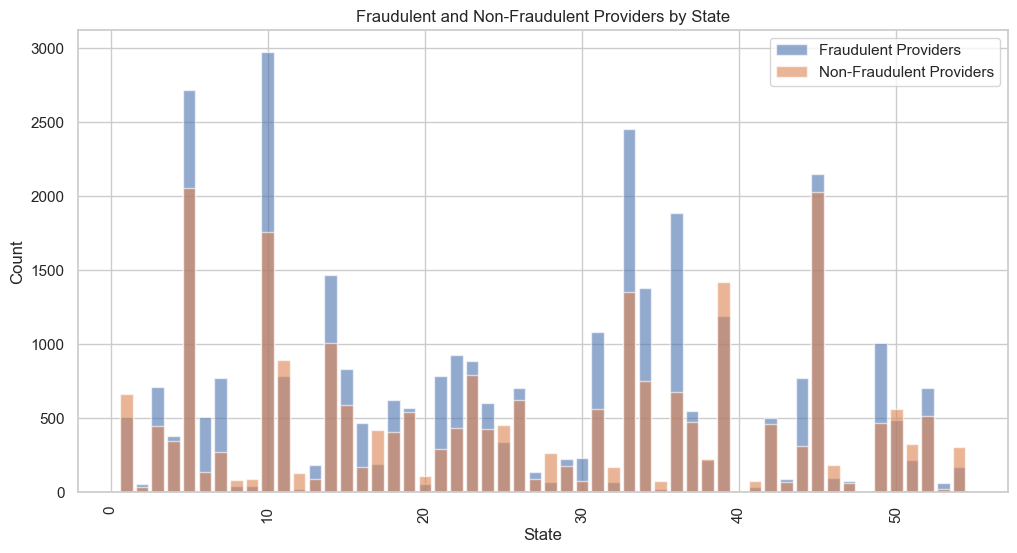

In [95]:
# Bar Chart of Fraudulent and Non-Fraudulent Providers by State
state_fraud_counts = inpatient_df[inpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()
state_nonfraud_counts = inpatient_df[inpatient_df['potentialfraud'] == 'No'].groupby('state')['provider'].count()

plt.figure(figsize=(12, 6))
plt.bar(state_fraud_counts.index, state_fraud_counts, label='Fraudulent Providers', alpha=0.6)
plt.bar(state_nonfraud_counts.index, state_nonfraud_counts, label='Non-Fraudulent Providers', alpha=0.6)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Fraudulent and Non-Fraudulent Providers by State')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
break

###  Visualizing Fraudulent and Non-Fraudulent providers by state and county for outpatient data and inpatient data using subplots

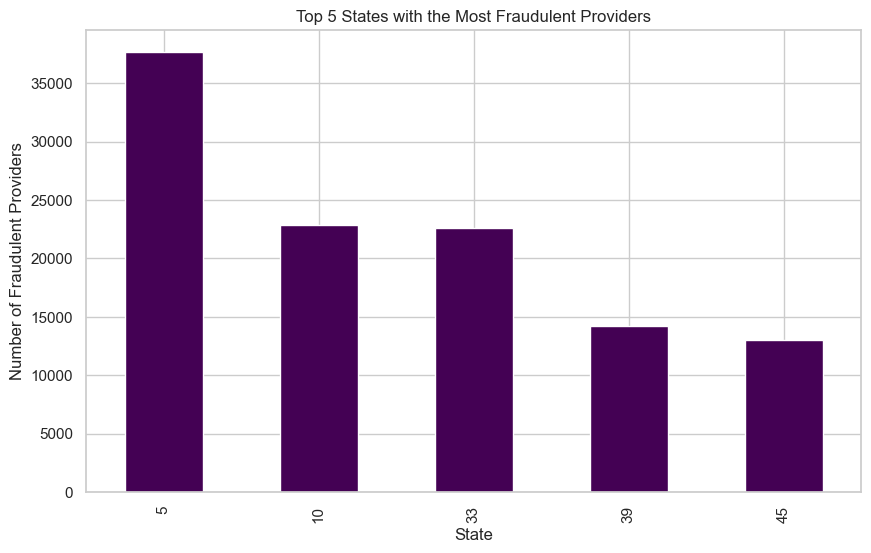

In [97]:
import matplotlib.pyplot as plt

# Group the data by state and count the number of fraudulent providers
fraud_counts = outpatient_df[outpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()

# Sort the states by the number of fraud cases in descending order and select the top 5
top_states = fraud_counts.sort_values(ascending=False).head(5)

# Create a bar graph to visualize the top 5 states with the most fraud
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', colormap='viridis')
plt.title('Top 5 States with the Most Fraudulent Providers')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Providers')
plt.show()


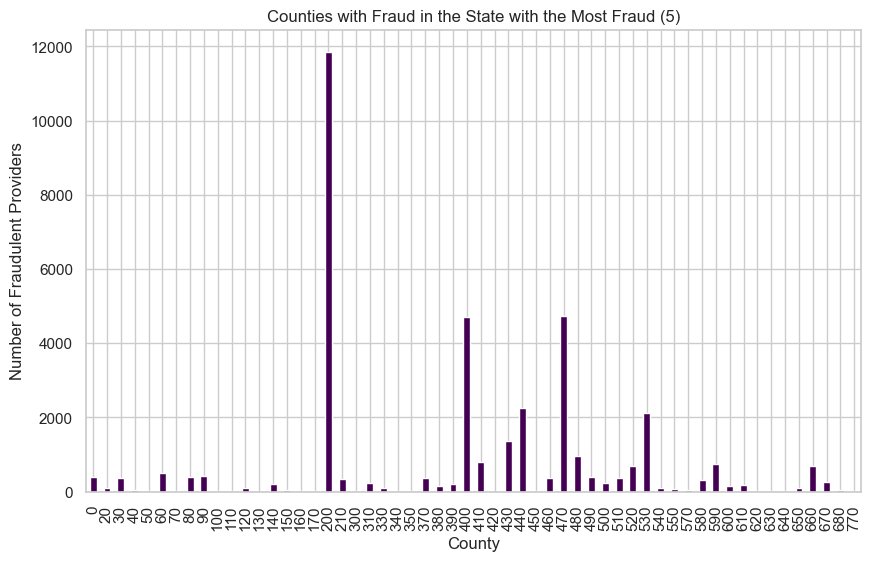

In [98]:
import matplotlib.pyplot as plt

# Group the data by state and count the number of fraudulent providers
fraud_counts = outpatient_df[outpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()

# Find the state with the most fraud
most_fraudulent_state = fraud_counts.idxmax()

# Filter the data for the state with the most fraud and count the number of fraudulent providers by county
county_fraud_counts = outpatient_df[(outpatient_df['potentialfraud'] == 'Yes') & (outpatient_df['state'] == most_fraudulent_state)].groupby('county')['provider'].count()

# Create a bar graph to visualize the counties with fraud in the state with the most fraud
plt.figure(figsize=(10, 6))
county_fraud_counts.plot(kind='bar', colormap='viridis')
plt.title(f'Counties with Fraud in the State with the Most Fraud ({most_fraudulent_state})')
plt.xlabel('County')
plt.ylabel('Number of Fraudulent Providers')
plt.show()


### Top 5 Counties in Top 5 States with Most Fraud

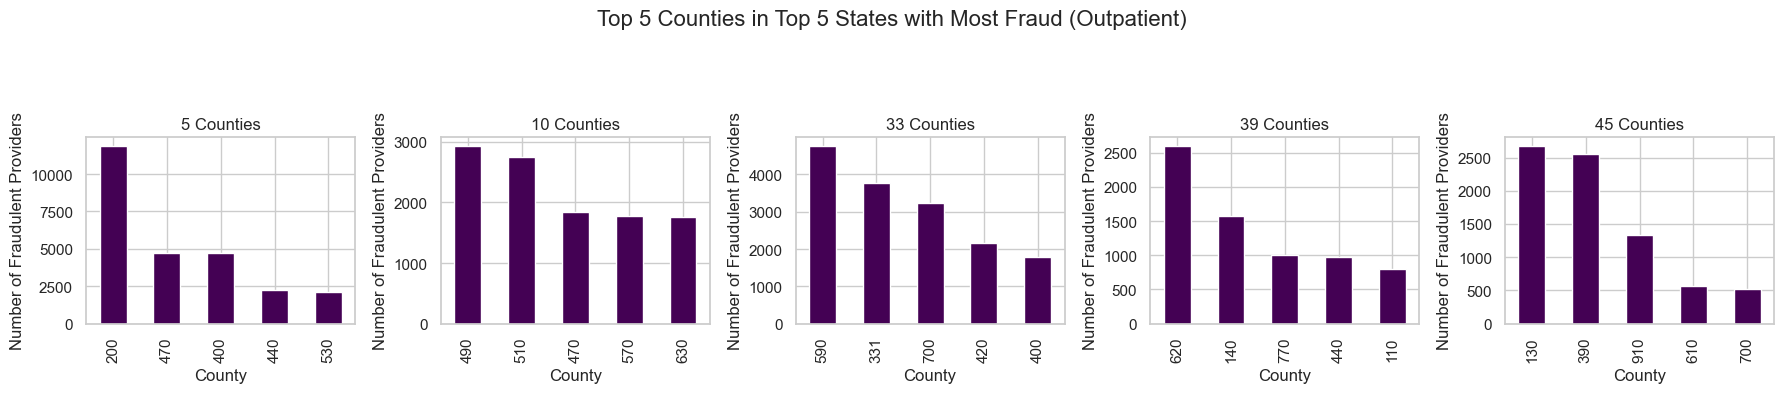

In [102]:

# First find the top 5 states with the most fraud
fraud_counts = outpatient_df[outpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()
top_states = fraud_counts.sort_values(ascending=False).head(5).index

# Create a figure for the subplots
fig = plt.figure(figsize=(18, 4))

# Add a title for the set of subplots
fig.suptitle('Top 5 Counties in Top 5 States with Most Fraud (Outpatient)', fontsize=16)

# Next find and visualize the top 5 counties with the most fraud in each of the top 5 states
for i, state in enumerate(top_states):
    county_fraud_counts = outpatient_df[(outpatient_df['potentialfraud'] == 'Yes') & (outpatient_df['state'] == state)].groupby('county')['provider'].count().sort_values(ascending=False).head(5)
    ax = fig.add_subplot(1, 5, i + 1)
    county_fraud_counts.plot(kind='bar', colormap='viridis', ax=ax)
    ax.set_title(f'{state} Counties')
    ax.set_xlabel('County')
    ax.set_ylabel('Number of Fraudulent Providers')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()


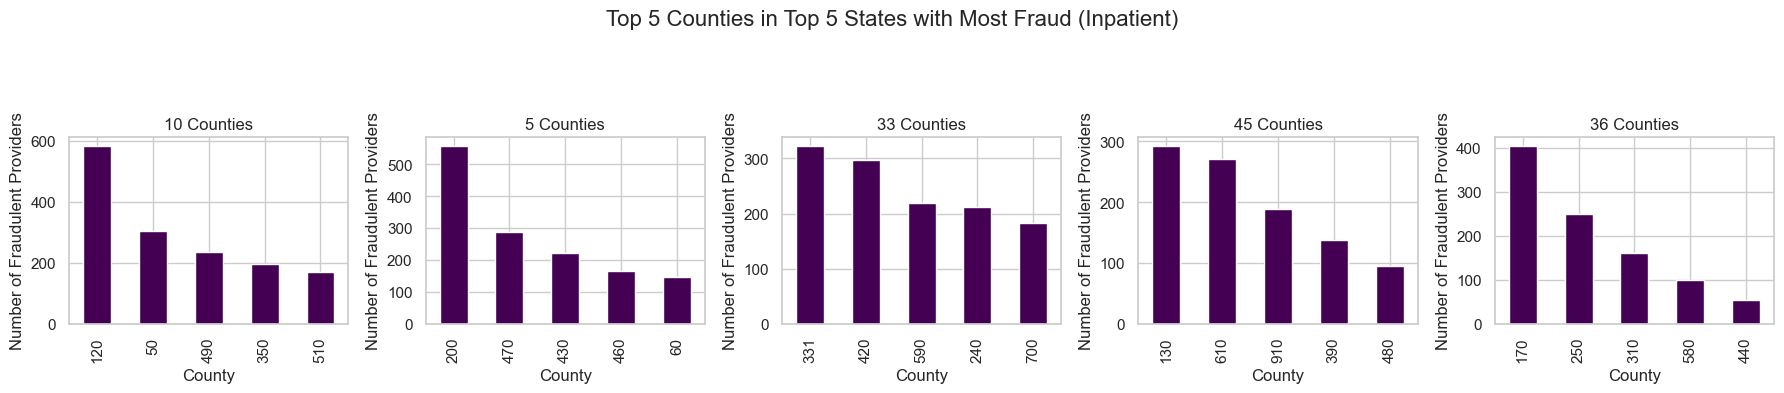

In [103]:

# First find the top 5 states with the most fraud
fraud_counts = inpatient_df[inpatient_df['potentialfraud'] == 'Yes'].groupby('state')['provider'].count()
top_states = fraud_counts.sort_values(ascending=False).head(5).index

# Create a figure for the subplots
fig = plt.figure(figsize=(18, 4))

# Add a title for the set of subplots
fig.suptitle('Top 5 Counties in Top 5 States with Most Fraud (Inpatient)', fontsize=16)

# Next find and visualize the top 5 counties with the most fraud in each of the top 5 states
for i, state in enumerate(top_states):
    county_fraud_counts = inpatient_df[(inpatient_df['potentialfraud'] == 'Yes') & (inpatient_df['state'] == state)].groupby('county')['provider'].count().sort_values(ascending=False).head(5)
    ax = fig.add_subplot(1, 5, i + 1)
    county_fraud_counts.plot(kind='bar', colormap='viridis', ax=ax)
    ax.set_title(f'{state} Counties')
    ax.set_xlabel('County')
    ax.set_ylabel('Number of Fraudulent Providers')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()


# Merge your data with the geospatial shapefile based on 'state' and 'county' columns
merged_gdf = gdf.merge(county_counts, left_on=['STUSPS', 'NAME'], right_on=['state', 'county'], how='left')

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.boundary.plot(ax=ax, linewidth=0.5, color='k')
merged_gdf.plot(column='Provider ID', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Provider Distribution by County')
plt.show()


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have a DataFrame 'data' with features, including 'claimduration' and a 'fraud' target variable

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['fraud'])
y = data['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


# list includes columns that are being excluded from the dataset
# keeping total charges
# For training set
columns_to_drop =['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
        'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'contract_type_One year', 'contract_type_Two year',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded', 'gender_encoded',
       'contract_type_month_to_month']


#prepares the training, validation, and testing datasets 
#by selecting specific columns and target variable for each set

X_train = train.drop(columns=columns_to_drop)
y_train = train['churn_encoded']

# For validation set
X_val = validate.drop(columns=columns_to_drop)
y_val = validate['churn_encoded']

# For testing set
X_test = test.drop(columns=columns_to_drop)
y_test = test['churn_encoded']


# Implementing Logistic Regression, Random Forest, and
#  K-Nearest Neighbors (KNN)
#  classification algorithms using Python's scikit-learn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_y_val_pred = logreg_model.predict(X_val)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_val_pred = rf_model.predict(X_val)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_val_pred = knn_model.predict(X_val)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    #(Receiver Operating Characteristic - Area Under the Curve)
    #ROC-AUC is a commonly used evaluation metric for binary classification problems
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("confusion_matrix:")
    print("---------------")
    print(confusion_matrix(y_true, y_pred))
    print("=" * 50)

evaluate_model(y_val, logreg_y_val_pred, "Logistic Regression")
evaluate_model(y_val, rf_y_val_pred, "Random Forest")
evaluate_model(y_val, knn_y_val_pred, "K-Nearest Neighbors")

In [ ]:
#  Ensemble methods: Bagging (e.g., Random Forest), 
# Boosting (e.g., Gradient Boosting), and Stacking

from sklearn.ensemble import VotingClassifier

# Define the ensemble of models
ensemble_model = VotingClassifier(estimators=[
    ('Logistic Regression', logreg_model),
    ('Random Forest', rf_model),
    ('K-Nearest Neighbors', knn_model)
])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_y_val_pred = ensemble_model.predict(X_val)

# Evaluate the ensemble model
evaluate_model(y_val, ensemble_y_val_pred, "Ensemble Model")
